In [1]:
import wandb
from helpers.wandb_common import get_wandb_df
from configs.defaults import Globs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
metric_cols = ['f1', 'acc']

In [2]:
df = get_wandb_df(Globs.PROJECT_NAME)

In [3]:
df = df[df.tags.apply(lambda x: 'best' in x or 'hyper' not in x)]

In [15]:
df.groupby(['DATASET', 'NUM_CLASSES', 'label_type', 'MODEL_NAME',])[metric_cols].agg(['mean', 'std'])

f1                 acc  \
                                                     mean       std      mean   
DATASET       NUM_CLASSES label_type MODEL_NAME                                 
variance_data 4           GPUDMM     fcn         0.302297  0.062972  0.332727   
                                     gbr         0.269965  0.048284  0.289091   
                                     knn         0.299923  0.038142  0.305455   
                                     lstm        0.292848  0.066765  0.305455   
                                     xgb         0.270865  0.039784  0.290000   
                          GSDMM      fcn         0.373738  0.037172  0.415455   
                                     gbr         0.270406  0.045895  0.329091   
                                     knn         0.338928  0.036124  0.384545   
                                     lstm        0.310091  0.040648  0.341818   
                                     xgb         0.285164  0.051023  0.358182   
                          LDA        fcn         0.285144  0.061564  0.347273   
                                     gbr         0.243218  0.043208  0.278182   
                                     knn         0.307983  0.045309  0.334545   
                                     lstm        0.302872  0.076418  0.326364   
                                     xgb         0.251884  0.034889  0.302727   
                          standard   fcn         0.270101  0.061316  0.322727   
                                     gbr         0.261183  0.051674  0.283636   
                                     knn         0.230951  0.037173  0.255455   
                                     lstm        0.263967  0.055383  0.310000   
                                     xgb         0.251441  0.039136  0.280909   
              5           GPUDMM     fcn         0.153304  0.013486  0.427877   
                                     gbr         0.114704  0.006007  0.290324   
                                     lstm        0.135630  0.019809  0.358996   
                                     xgb         0.129708  0.005370  0.349372   
                          GSDMM      fcn         0.173215  0.007667  0.478870   
                                     gbr         0.131768  0.005891  0.359676   
                                     lstm        0.143057  0.015676  0.393044   
                                     xgb         0.151833  0.007800  0.431747   
                          LDA        fcn         0.155838  0.019285  0.436820   
                                     gbr         0.122910  0.006050  0.321914   
                                     lstm        0.137781  0.011422  0.380387   
                                     xgb         0.140018  0.005809  0.389331   
                          standard   fcn         0.156159  0.017603  0.480230   
                                     gbr         0.117244  0.006743  0.313598   
                                     lstm        0.139406  0.021088  0.400837   
                                     xgb         0.137487  0.004344  0.384571   

                                                           
                                                      std  
DATASET       NUM_CLASSES label_type MODEL_NAME            
variance_data 4           GPUDMM     fcn         0.044987  
                                     gbr         0.046116  
                                     knn         0.041150  
                                     lstm        0.053560  
                                     xgb         0.035196  
                          GSDMM      fcn         0.036376  
                                     gbr         0.043239  
                                     knn         0.028764  
                                     lstm        0.036414  
                                     xgb         0.052521  
                          LDA        fcn         0.051211  
                                     gbr         0.0374

In [17]:
df.groupby(['DATASET', 'NUM_CLASSES', 'MODEL_NAME',])[metric_cols].agg(['mean', 'std'])

f1                 acc          
                                          mean       std      mean       std
DATASET       NUM_CLASSES MODEL_NAME                                        
rossmann      3           fcn         0.983792  0.006358  0.991446  0.000581
                          gbr         0.900750  0.017722  0.977739  0.002058
                          knn         0.969804  0.014570  0.987994  0.000621
                          lstm        0.982428  0.007524  0.989871  0.001059
                          xgb         0.957905  0.013436  0.985694  0.000816
rule_based    4           fcn         0.908612  0.013688  0.916327  0.013242
                          gbr         0.398500  0.038912  0.400000  0.039249
                          knn         0.391325  0.022491  0.403401  0.026062
                          lstm        0.809177  0.035845  0.814286  0.033024
                          xgb         0.403355  0.050911  0.406803  0.051289
              5           fcn         0.297401  0.024909  0.633952  0.046369
                          gbr         0.132437  0.005435  0.353657  0.020765
                          knn         0.142353  0.004370  0.380731  0.013999
                          lstm        0.211589  0.014198  0.532069  0.042477
                          xgb         0.156388  0.004399  0.432314  0.017615
variance_data 4           fcn         0.307820  0.067785  0.354545  0.059203
                          gbr         0.261193  0.046856  0.295000  0.047348
                          knn         0.294446  0.055002  0.320000  0.061147
                          lstm        0.292445  0.061491  0.320909  0.053573
                          xgb         0.264838  0.042482  0.307955  0.048769
              5           fcn         0.159629  0.016650  0.455949  0.081038
                          gbr         0.121657  0.008904  0.321378  0.031200
                          lstm        0.138969  0.016957  0.383316  0.067056
                          xgb         0.139761  0.009872  0.388755  0.034420

<AxesSubplot:xlabel='DATASET', ylabel='f1'>

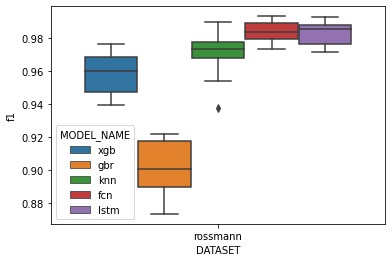

In [18]:
df_s = df[df['DATASET'] == 'rossmann']
sns.boxplot(x = df_s['DATASET'],
            y = df_s['f1'],
            hue = df_s['MODEL_NAME'])

<AxesSubplot:xlabel='DATASET', ylabel='f1'>

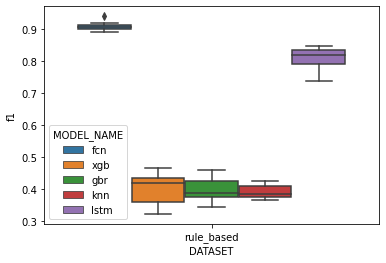

In [19]:
df_s = df[(df['DATASET'] == 'rule_based') & (df['NUM_CLASSES']==4)]
sns.boxplot(x = df_s['DATASET'],
            y = df_s['f1'],
            hue = df_s['MODEL_NAME'])

<AxesSubplot:xlabel='DATASET', ylabel='f1'>

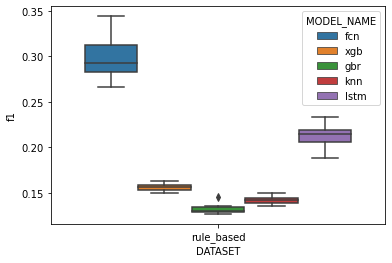

In [20]:
df_s = df[(df['DATASET'] == 'rule_based') & (df['NUM_CLASSES']==5)]
sns.boxplot(x = df_s['DATASET'],
            y = df_s['f1'],
            hue = df_s['MODEL_NAME'])


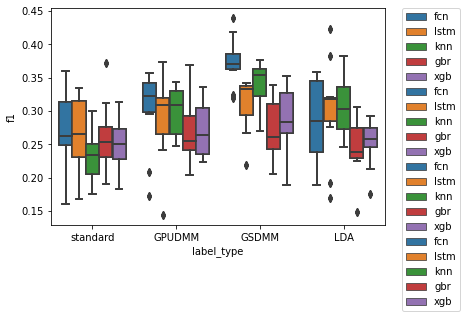

In [21]:
label_types = df['label_type'].dropna().unique().tolist()
for label_type in label_types:
    df_s = df[(df['DATASET'] == 'variance_data') & 
            (df['NUM_CLASSES']==4)]
    sns.boxplot(x = df_s['label_type'],
                y = df_s['f1'],
                hue = df_s['MODEL_NAME'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

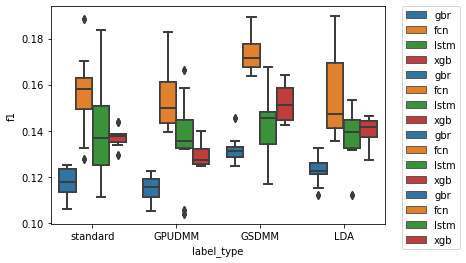

In [22]:
label_types = df['label_type'].dropna().unique().tolist()
for label_type in label_types:
    df_s = df[(df['DATASET'] == 'variance_data') & 
            (df['NUM_CLASSES']==5)]
    sns.boxplot(x = df_s['label_type'],
                y = df_s['f1'],
                hue = df_s['MODEL_NAME'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Final figs and tables

In [67]:
df_v = df.groupby(['DATASET', 'NUM_CLASSES', 'label_type', 'MODEL_NAME',])[metric_cols].agg(['mean', 'std'])
df_v = df_v[df_v.index.isin(['standard'], level=2)].droplevel('label_type')

In [68]:
df_s = df.groupby(['DATASET', 'NUM_CLASSES', 'MODEL_NAME',])[metric_cols].agg(['mean', 'std'])
df_s = df_s[~df_s.index.isin(['variance_data'], level=0)]

In [69]:
df_c = pd.concat([df_s, df_v])
df_c

f1                 acc          
                                          mean       std      mean       std
DATASET       NUM_CLASSES MODEL_NAME                                        
rossmann      3           fcn         0.983792  0.006358  0.991446  0.000581
                          gbr         0.900750  0.017722  0.977739  0.002058
                          knn         0.969804  0.014570  0.987994  0.000621
                          lstm        0.982428  0.007524  0.989871  0.001059
                          xgb         0.957905  0.013436  0.985694  0.000816
rule_based    4           fcn         0.908612  0.013688  0.916327  0.013242
                          gbr         0.398500  0.038912  0.400000  0.039249
                          knn         0.391325  0.022491  0.403401  0.026062
                          lstm        0.809177  0.035845  0.814286  0.033024
                          xgb         0.403355  0.050911  0.406803  0.051289
              5           fcn         0.297401  0.024909  0.633952  0.046369
                          gbr         0.132437  0.005435  0.353657  0.020765
                          knn         0.142353  0.004370  0.380731  0.013999
                          lstm        0.211589  0.014198  0.532069  0.042477
                          xgb         0.156388  0.004399  0.432314  0.017615
variance_data 4           fcn         0.270101  0.061316  0.322727  0.058171
                          gbr         0.261183  0.051674  0.283636  0.050307
                          knn         0.230951  0.037173  0.255455  0.037957
                          lstm        0.263967  0.055383  0.310000  0.042522
                          xgb         0.251441  0.039136  0.280909  0.031912
              5           fcn         0.156159  0.017603  0.480230  0.115285
                          gbr         0.117244  0.006743  0.313598  0.022971
                          lstm        0.139406  0.021088  0.400837  0.092950
                          xgb         0.137487  0.004344  0.384571  0.024202

In [59]:
# Save results
# df_c.to_csv('reports/results.csv')

In [70]:
df_c['final', 'f1'] = round(df_c['f1', 'mean'], 3).astype('str') + ' $\pm$ ' + round(df_c['f1', 'std'],3).astype('str')
df_c['final', 'acc'] = round(df_c['acc', 'mean'], 3).astype('str') + ' $\pm$ ' + round(df_c['acc', 'std'],3).astype('str')
df_c.drop(['f1', 'acc'], axis=1, level=0, inplace=True)

In [71]:
df_c

final                   
                                                     f1                acc
DATASET       NUM_CLASSES MODEL_NAME                                      
rossmann      3           fcn         0.984 $\pm$ 0.006  0.991 $\pm$ 0.001
                          gbr         0.901 $\pm$ 0.018  0.978 $\pm$ 0.002
                          knn          0.97 $\pm$ 0.015  0.988 $\pm$ 0.001
                          lstm        0.982 $\pm$ 0.008   0.99 $\pm$ 0.001
                          xgb         0.958 $\pm$ 0.013  0.986 $\pm$ 0.001
rule_based    4           fcn         0.909 $\pm$ 0.014  0.916 $\pm$ 0.013
                          gbr         0.398 $\pm$ 0.039    0.4 $\pm$ 0.039
                          knn         0.391 $\pm$ 0.022  0.403 $\pm$ 0.026
                          lstm        0.809 $\pm$ 0.036  0.814 $\pm$ 0.033
                          xgb         0.403 $\pm$ 0.051  0.407 $\pm$ 0.051
              5           fcn         0.297 $\pm$ 0.025  0.634 $\pm$ 0.046
                          gbr         0.132 $\pm$ 0.005  0.354 $\pm$ 0.021
                          knn         0.142 $\pm$ 0.004  0.381 $\pm$ 0.014
                          lstm        0.212 $\pm$ 0.014  0.532 $\pm$ 0.042
                          xgb         0.156 $\pm$ 0.004  0.432 $\pm$ 0.018
variance_data 4           fcn          0.27 $\pm$ 0.061  0.323 $\pm$ 0.058
                          gbr         0.261 $\pm$ 0.052   0.284 $\pm$ 0.05
                          knn         0.231 $\pm$ 0.037  0.255 $\pm$ 0.038
                          lstm        0.264 $\pm$ 0.055   0.31 $\pm$ 0.043
                          xgb         0.251 $\pm$ 0.039  0.281 $\pm$ 0.032
              5           fcn         0.156 $\pm$ 0.018   0.48 $\pm$ 0.115
                          gbr         0.117 $\pm$ 0.007  0.314 $\pm$ 0.023
                          lstm        0.139 $\pm$ 0.021  0.401 $\pm$ 0.093
                          xgb         0.137 $\pm$ 0.004  0.385 $\pm$ 0.024

In [72]:
print(df_c.to_latex(escape=False))

\begin{tabular}{lllll}
\toprule
              &   &     & \multicolumn{2}{l}{final} \\
              &   &     &                 f1 &                acc \\
DATASET & NUM_CLASSES & MODEL_NAME &                    &                    \\
\midrule
rossmann & 3 & fcn &  0.984 $\pm$ 0.006 &  0.991 $\pm$ 0.001 \\
              &   & gbr &  0.901 $\pm$ 0.018 &  0.978 $\pm$ 0.002 \\
              &   & knn &   0.97 $\pm$ 0.015 &  0.988 $\pm$ 0.001 \\
              &   & lstm &  0.982 $\pm$ 0.008 &   0.99 $\pm$ 0.001 \\
              &   & xgb &  0.958 $\pm$ 0.013 &  0.986 $\pm$ 0.001 \\
rule_based & 4 & fcn &  0.909 $\pm$ 0.014 &  0.916 $\pm$ 0.013 \\
              &   & gbr &  0.398 $\pm$ 0.039 &    0.4 $\pm$ 0.039 \\
              &   & knn &  0.391 $\pm$ 0.022 &  0.403 $\pm$ 0.026 \\
              &   & lstm &  0.809 $\pm$ 0.036 &  0.814 $\pm$ 0.033 \\
              &   & xgb &  0.403 $\pm$ 0.051 &  0.407 $\pm$ 0.051 \\
              & 5 & fcn &  0.297 $\pm$ 0.025 &  0.634 $\pm$ 0.046 \\
  